<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv"

#https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/
#csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
us_pop = 329968629  #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US: {res.positive/us_pop*100:2f}%")

positive     160530
negative     784324
pending       65382
death          2939
total       1010236
dtype: int64
Current Infection Rate 15.890346%
Percentage of US: 0.048650%


In [7]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative
37,NY,66497,119971
34,NJ,16636,25224
24,MI,6498,11893
5,CA,6447,20549
21,MA,5752,37041
10,FL,5473,48225
16,IL,5057,25389
52,WA,4896,60566
41,PA,4087,33777
20,LA,4025,30008


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA.positive.sum().reset_index().copy()
dfCAPos = gbCA.positive.sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [9]:
dfUSAPos[-7:]

,date,positive,PCT
20,20200324,51954,0.323640
21,20200325,63928,0.398231
22,20200326,80735,0.502928
23,20200327,99413,0.619280
24,20200328,118234,0.736523
25,20200329,139061,0.866262
26,20200330,160530,1.000000


In [10]:
dfCAPos[-7:]

,date,positive,PCT
20,20200324,2102,0.326043
21,20200325,2355,0.365286
22,20200326,3006,0.466263
23,20200327,3879,0.601675
24,20200328,4643,0.720180
25,20200329,5708,0.885373
26,20200330,6447,1.000000


In [11]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200326,80735,438603,60251,10131.0,1163,579589,519338,264.0,3996.0,80999.0,16807.0,97806.0
20200327,99413,527220,60094,13717.0,1530,686727,626633,367.0,3652.0,88617.0,18678.0,107295.0
20200328,118234,617470,65712,16729.0,1965,801416,735704,435.0,3012.0,90250.0,18821.0,109071.0
20200329,139061,692290,65549,19730.0,2428,896900,831351,463.0,3001.0,74820.0,20827.0,95647.0
20200330,160530,784324,65382,22303.0,2939,1010236,944854,511.0,2573.0,92034.0,21469.0,113503.0


In [12]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200326,3006,17380,57400,0.0,65,77786,20386,12.0,0.0,1459.0,651.0,2110.0
20200327,3879,17380,57400,746.0,78,78659,21259,13.0,746.0,0.0,873.0,873.0
20200328,4643,20549,64400,1034.0,101,89592,25192,23.0,288.0,3169.0,764.0,3933.0
20200329,5708,20549,64400,1034.0,123,90657,26257,22.0,0.0,0.0,1065.0,1065.0
20200330,6447,20549,64400,1432.0,133,91396,26996,10.0,398.0,0.0,739.0,739.0


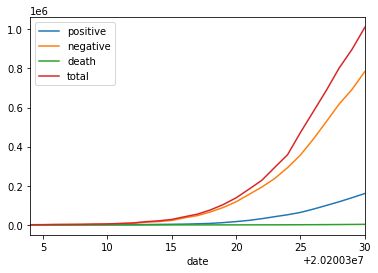

In [13]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [14]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
20200317,3503,58
20200318,3536,58
20200319,7087,100
20200320,10442,150
20200321,15219,201
20200322,15219,201
20200323,31573,402
20200324,42164,471
20200325,51914,673


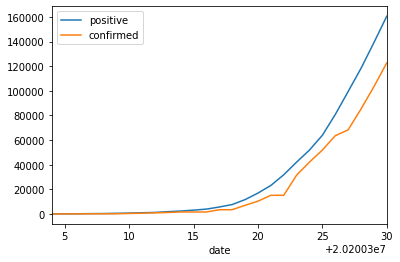

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [16]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200324,2102,13452,12100,0.0,40,27654,15554,13.0,0.0,885.0,369.0,1254.0
20200325,2355,15921,48600,0.0,53,66876,18276,13.0,0.0,2469.0,253.0,2722.0
20200326,3006,17380,57400,0.0,65,77786,20386,12.0,0.0,1459.0,651.0,2110.0
20200327,3879,17380,57400,746.0,78,78659,21259,13.0,746.0,0.0,873.0,873.0
20200328,4643,20549,64400,1034.0,101,89592,25192,23.0,288.0,3169.0,764.0,3933.0
20200329,5708,20549,64400,1034.0,123,90657,26257,22.0,0.0,0.0,1065.0,1065.0
20200330,6447,20549,64400,1432.0,133,91396,26996,10.0,398.0,0.0,739.0,739.0


In [17]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    140886
dead           2467
dtype: int64

In [18]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    5852
dead          124
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [20]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                140886
Italy              97689
China              82122
Spain              80110
Germany            62095
France             40708
Iran               38309
United Kingdom     19780
Switzerland        14829
Netherlands        10930
Name: confirmed, dtype: int64

In [21]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(20)

country
US                140886
Italy              97689
China              82122
Spain              80110
Germany            62095
France             40708
Iran               38309
United Kingdom     19780
Switzerland        14829
Netherlands        10930
Belgium            10836
Korea, South        9583
Turkey              9217
Austria             8788
Canada              6280
Portugal            5962
Norway              4284
Brazil              4256
Israel              4247
Australia           3984
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [26]:
dfState.loc['FL'].head(7)

,date,positive,current_total,pct
state,,,,
FL,20200330,5473,5473,1.000000
FL,20200329,4246,5473,0.775809
FL,20200328,3763,5473,0.687557
FL,20200327,2765,5473,0.505207
FL,20200326,2355,5473,0.430294
FL,20200325,1682,5473,0.307327
FL,20200324,1412,5473,0.257994


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

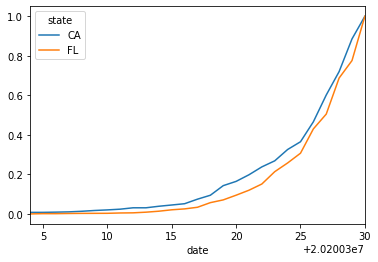

In [76]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

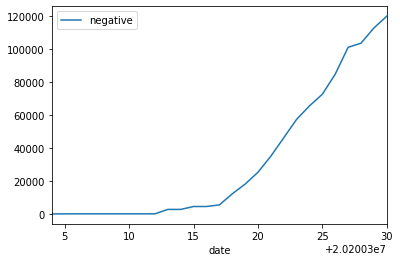

In [30]:
x = dfNYTesting.plot.line()

In [31]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,current_total,pct
244,FL,20200330,5473,5473,1.000000
245,FL,20200329,4246,5473,0.775809
246,FL,20200328,3763,5473,0.687557
247,FL,20200327,2765,5473,0.505207
248,FL,20200326,2355,5473,0.430294
249,FL,20200325,1682,5473,0.307327
250,FL,20200324,1412,5473,0.257994
251,FL,20200323,1171,5473,0.213959
252,FL,20200322,830,5473,0.151654
253,FL,20200321,658,5473,0.120227


In [32]:
datecutoff = int(((pd.to_datetime(str(dfDates.date.max())))-datetime.timedelta(days=3)).strftime("%Y%m%d"))
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .60)].sort_values(by='positive',ascending=False)


,state,date,positive,current_total,pct
834,NJ,20200327,8825,16636,0.530476
592,MI,20200327,3657,6498,0.562789
515,MA,20200327,3240,5752,0.563282
389,IL,20200327,3026,5057,0.598378
247,FL,20200327,2765,5473,0.505207
1015,PA,20200327,2218,4087,0.542696
146,CO,20200327,1430,2627,0.544347
172,CT,20200327,1291,2571,0.502139
938,OH,20200327,1137,1933,0.588205
416,IN,20200327,981,1786,0.549272


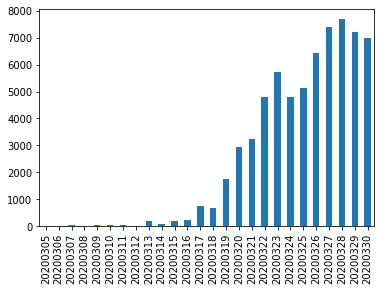

In [85]:
state = 'NY'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar()

